# Customer Segmentation

In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

In [4]:
# Loading the transaction dataset

trans=pd.read_csv('/content/Transaction_Cleaned_Data (1).csv')

In [5]:
# Fetching first five transactio record

trans.head()

,event_time,order_id,product_id,category_id,brand,price,user_id,brand_loyalty
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1
2,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18,1
3,2020-04-24 14:37:43+00:00,2294444024058086220,2273948319057183658,2.268105e+18,huawei,77.52,1.515916e+18,1
4,2020-04-24 19:16:21+00:00,2294584263154074236,2273948316817424439,2.268105e+18,Other,217.57,1.515916e+18,1


In [7]:
print("Total records (rows) in the Transaction Dataset : {}".format(trans.shape[0]))
print("Total features (columns) in the Transaction Dataset : {}".format(trans.shape[1]))

Total records (rows) in the Transaction Dataset : 21972
Total features (columns) in the Transaction Dataset : 8


In [8]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21972 entries, 0 to 21971
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     21972 non-null  object 
 1   order_id       21972 non-null  int64  
 2   product_id     21972 non-null  int64  
 3   category_id    21972 non-null  float64
 4   brand          21972 non-null  object 
 5   price          21972 non-null  float64
 6   user_id        21972 non-null  float64
 7   brand_loyalty  21972 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 1.3+ MB


**The data-type of transaction_date column is not in date-time format. Hence the data-type of the column should be changed from object to datetime type.**

In [9]:
trans['event_time']= pd.to_datetime(trans['event_time'])


# 1. RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service.

Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [13]:
# Maximum Transaction Date or the latest transaction date.

max_trans_date = max(trans['event_time']).date()
max_trans_date

datetime.date(2020, 6, 11)

In [15]:
# Taking the last transaction date as a reference date for comparision and
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date = datetime.strptime(str(max_trans_date), "%Y-%m-%d")
comparison_date

datetime.datetime(2020, 6, 11, 0, 0)

In [63]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data.

trans['recency'] = (trans['event_time'].max() - trans['event_time']).dt.days

# Calculate recency scores (lower score indicates more recent)
recency_scores = trans.groupby('product_id')['recency'].min().reset_index()
# recency_scores.rename(columns={'recency': 'recency_score'}, inplace=True)

In [64]:
# Calculate frequency
frequency = trans['product_id'].value_counts().reset_index()
frequency.columns = ['product_id', 'frequency']

print(frequency)

               product_id  frequency
0     1515966223509088521        192
1     1515966223509088620        191
2     1515966223509089045        182
3     1515966223509088532        149
4     2273948308235878951        143
...                   ...        ...
5277  1515966223509258204          1
5278  1515966223510235351          1
5279  1515966223509603403          1
5280  1515966223510402021          1
5281  1515966223510433289          1

[5282 rows x 2 columns]


In [65]:
# Calculate monetary (total revenue)
monetary = trans.groupby('product_id')['price'].sum().reset_index()
monetary.rename(columns={'price': 'monetary'}, inplace=True)

print(monetary)


               product_id  monetary
0     1515966223509088493  11110.80
1     1515966223509088496   1064.72
2     1515966223509088497  41318.50
3     1515966223509088498   2314.40
4     1515966223509088499  14443.92
...                   ...       ...
5277  2309018264107221207     37.01
5278  2309018264266604952    127.29
5279  2309018264300159434    925.88
5280  2309018264576983697   1129.52
5281  2327613725781000907    661.78

[5282 rows x 2 columns]


In [89]:
# Merge recency, frequency, and monetary scores
rfm_table = pd.merge(recency_scores, frequency, on='product_id')
rfm_table = pd.merge(rfm_table, monetary, on='product_id')

rfm_table

,product_id,recency,frequency,monetary
0,1515966223509088493,7,15,11110.80
1,1515966223509088496,11,4,1064.72
2,1515966223509088497,10,34,41318.50
3,1515966223509088498,7,20,2314.40
4,1515966223509088499,3,24,14443.92
...,...,...,...,...
5277,2309018264107221207,2,1,37.01
5278,2309018264266604952,16,1,127.29
5279,2309018264300159434,2,2,925.88
5280,2309018264576983697,7,4,1129.52


In [90]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['r_quartile'] = pd.qcut(rfm_table['recency'], 4, labels=['4', '3', '2', '1'])
rfm_table['f_quartile'] = pd.qcut(rfm_table['frequency'], 4, labels=['1', '2', '3'], duplicates='drop')
rfm_table['m_quartile'] = pd.qcut(rfm_table['monetary'], 4, labels=['1', '2', '3', '4'], duplicates='drop')

In [91]:
rfm_table

,product_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,1515966223509088493,7,15,11110.80,3,3,4
1,1515966223509088496,11,4,1064.72,3,2,4
2,1515966223509088497,10,34,41318.50,3,3,4
3,1515966223509088498,7,20,2314.40,3,3,4
4,1515966223509088499,3,24,14443.92,4,3,4
...,...,...,...,...,...,...,...
5277,2309018264107221207,2,1,37.01,4,1,2
5278,2309018264266604952,16,1,127.29,2,1,3
5279,2309018264300159434,2,2,925.88,4,1,4
5280,2309018264576983697,7,4,1129.52,3,2,4


In [102]:
# Calculate RFM score by combining quartiles
rfm_table['rfm_score'] = rfm_table['r_quartile'].astype(str) + rfm_table['f_quartile'].astype(str) + rfm_table['m_quartile'].astype(str)

In [103]:
rfm_table

,product_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score
0,1515966223509088493,7,15,11110.80,3,3,4,334
1,1515966223509088496,11,4,1064.72,3,2,4,324
2,1515966223509088497,10,34,41318.50,3,3,4,334
3,1515966223509088498,7,20,2314.40,3,3,4,334
4,1515966223509088499,3,24,14443.92,4,3,4,434
...,...,...,...,...,...,...,...,...
5277,2309018264107221207,2,1,37.01,4,1,2,412
5278,2309018264266604952,16,1,127.29,2,1,3,213
5279,2309018264300159434,2,2,925.88,4,1,4,414
5280,2309018264576983697,7,4,1129.52,3,2,4,324


In [108]:
# Assigning a title to a customer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.


In [109]:
# Handle NaN values by filling them with a default value (e.g., 0)
rfm_table['rfm_score'].fillna(0, inplace=True)

# Convert 'rfm_score' to a numeric data type to handle NaN values
rfm_table['rfm_score'] = pd.to_numeric(rfm_table['rfm_score'], errors='coerce')

# Define quartile labels
labels = ['Bronze', 'Silver', 'Gold', 'Platinum']

# Calculate quartiles and assign loyalty titles
rfm_table['customer_title'] = pd.qcut(rfm_table['rfm_score'], 4, labels)

# Display the DataFrame with assigned loyalty titles
rfm_table


,product_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,1515966223509088493,7,15,11110.80,3,3,4,334,Gold
1,1515966223509088496,11,4,1064.72,3,2,4,324,Gold
2,1515966223509088497,10,34,41318.50,3,3,4,334,Gold
3,1515966223509088498,7,20,2314.40,3,3,4,334,Gold
4,1515966223509088499,3,24,14443.92,4,3,4,434,Platinum
...,...,...,...,...,...,...,...,...,...
5277,2309018264107221207,2,1,37.01,4,1,2,412,Platinum
5278,2309018264266604952,16,1,127.29,2,1,3,213,Silver
5279,2309018264300159434,2,2,925.88,4,1,4,414,Platinum
5280,2309018264576983697,7,4,1129.52,3,2,4,324,Gold


# Merging both RFM Table with Transaction

In [110]:
trans_rfm = pd.merge(trans, rfm_table, left_on='product_id', right_on='product_id', how='inner')

In [111]:
trans_rfm

,event_time,order_id,product_id,category_id,brand,price,user_id,brand_loyalty,recency_x,recency_y,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,47,1,13,2106.13,4,3,4,434,Platinum
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,47,1,13,2106.13,4,3,4,434,Platinum
2,2020-05-10 12:33:12+00:00,2305977760524272239,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,31,1,13,2106.13,4,3,4,434,Platinum
3,2020-05-16 07:58:26+00:00,2310188121796378674,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,26,1,13,2106.13,4,3,4,434,Platinum
4,2020-05-17 15:00:08+00:00,2311125144107484149,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,24,1,13,2106.13,4,3,4,434,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21967,2020-06-11 10:00:27+00:00,2329093704402338028,1515966223510393897,2.268105e+18,Other,36.78,1.515916e+18,0,0,0,1,36.78,4,1,2,412,Platinum
21968,2020-06-11 10:15:31+00:00,2329101287250985910,2273948234474848626,2.268105e+18,Other,13.63,1.515916e+18,0,0,0,1,13.63,4,1,1,411,Gold
21969,2020-06-11 10:20:38+00:00,2329103859516965043,2273948287205638533,2.268105e+18,Other,23.13,1.515916e+18,1,0,0,1,23.13,4,1,1,411,Gold
21970,2020-06-11 10:28:05+00:00,2329107610692747806,1515966223509565569,2.268105e+18,lg,2106.46,1.515916e+18,1,0,0,1,2106.46,4,1,4,414,Platinum


In [112]:
trans_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21972 entries, 0 to 21971
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   event_time      21972 non-null  datetime64[ns, UTC]
 1   order_id        21972 non-null  int64              
 2   product_id      21972 non-null  int64              
 3   category_id     21972 non-null  float64            
 4   brand           21972 non-null  object             
 5   price           21972 non-null  float64            
 6   user_id         21972 non-null  float64            
 7   brand_loyalty   21972 non-null  int64              
 8   recency_x       21972 non-null  int64              
 9   recency_y       21972 non-null  int64              
 10  frequency       21972 non-null  int64              
 11  monetary        21972 non-null  float64            
 12  r_quartile      21972 non-null  category           
 13  f_quartile      21972 non-null 

# Creating a Detail Customer title / tag based on RFM Score

An extended version of customer title is made which divides the entire number of customers into 11 groups. The groups are mainly Platinum Customers, Very Loyal, Becoming Loyal, Recent Customers, Potential Customers, Late Bloomer, Loosing Customers, High Risk Customers, Almost Lost Customers, Evasive Customers and Lost Customers.
The demarkation of customers into the above mentioned groups is based on their RFM scores.

In [113]:
# Function as a lookup to appropiate customer titles based on RFM score.

def cust_score_title_lkup(cols):

    rfm_score = cols[0]

    if rfm_score >= 444:
        return 'Platinum Customer'
    elif rfm_score >=433 and rfm_score < 444:
        return 'Very Loyal'
    elif rfm_score >=421 and rfm_score < 433:
        return 'Becoming Loyal'
    elif rfm_score >=344 and rfm_score < 421:
        return 'Recent Customer'
    elif rfm_score >=323 and rfm_score < 344:
        return 'Potential Customer'
    elif rfm_score >=311 and rfm_score < 323:
        return 'Late Bloomer'
    elif rfm_score >=224 and rfm_score < 311:
        return 'Loosing Customer'
    elif rfm_score >=212 and rfm_score < 224:
        return 'High Risk Customer'
    elif rfm_score >=124 and rfm_score < 212:
        return 'Almost Lost Customer'
    elif rfm_score >=112 and rfm_score < 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [115]:

# Applying the above functions and creating a new feature detail_cust_title

trans_rfm['detail_cust_title']=trans_rfm[['rfm_score']].apply(cust_score_title_lkup, axis=1)

In [116]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):

    title = cols[0]

    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11


In [118]:
# Applying the above functions and creating a new feature rank

trans_rfm['rank']=trans_rfm[['detail_cust_title']].apply(get_rank, axis=1)

In [168]:
trans_rfm

,event_time,order_id,product_id,category_id,brand,price,user_id,brand_loyalty,recency_x,recency_y,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_score,customer_title,detail_cust_title,rank,month
0,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,47,1,13,2106.13,4,3,4,434,Platinum,Very Loyal,2,2020-04
1,2020-04-24 11:50:39+00:00,2294359932054536986,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,47,1,13,2106.13,4,3,4,434,Platinum,Very Loyal,2,2020-04
2,2020-05-10 12:33:12+00:00,2305977760524272239,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,31,1,13,2106.13,4,3,4,434,Platinum,Very Loyal,2,2020-05
3,2020-05-16 07:58:26+00:00,2310188121796378674,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,26,1,13,2106.13,4,3,4,434,Platinum,Very Loyal,2,2020-05
4,2020-05-17 15:00:08+00:00,2311125144107484149,1515966223509089906,2.268105e+18,samsung,162.01,1.515916e+18,1,24,1,13,2106.13,4,3,4,434,Platinum,Very Loyal,2,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21967,2020-06-11 10:00:27+00:00,2329093704402338028,1515966223510393897,2.268105e+18,Other,36.78,1.515916e+18,0,0,0,1,36.78,4,1,2,412,Platinum,Recent Customer,4,2020-06
21968,2020-06-11 10:15:31+00:00,2329101287250985910,2273948234474848626,2.268105e+18,Other,13.63,1.515916e+18,0,0,0,1,13.63,4,1,1,411,Gold,Recent Customer,4,2020-06
21969,2020-06-11 10:20:38+00:00,2329103859516965043,2273948287205638533,2.268105e+18,Other,23.13,1.515916e+18,1,0,0,1,23.13,4,1,1,411,Gold,Recent Customer,4,2020-06
21970,2020-06-11 10:28:05+00:00,2329107610692747806,1515966223509565569,2.268105e+18,lg,2106.46,1.515916e+18,1,0,0,1,2106.46,4,1,4,414,Platinum,Recent Customer,4,2020-06


# 2. Exporting to csv file

After performing data quality assessment(DQA), data cleaning and RFM Analysis on the dataset, it's time to export the dataset to a csv file for further exploratory data analysis (EDA)

In [119]:
trans_rfm.to_csv('Customer_Trans_RFM_Analysis.csv', index=False)

In [120]:
print("Total records in final dataset : {}".format(trans_rfm.shape[0]))

Total records in final dataset : 21972


# 3. Data Analysis and Exploration

**3.1.  Distribution of customers across different RFM segments.**

In [122]:
# Calculate the count of customers or sales in each RFM segment
rfm_segment_counts = trans_rfm['customer_title'].value_counts().reset_index()
rfm_segment_counts.columns = ['RFM Segment', 'Count']

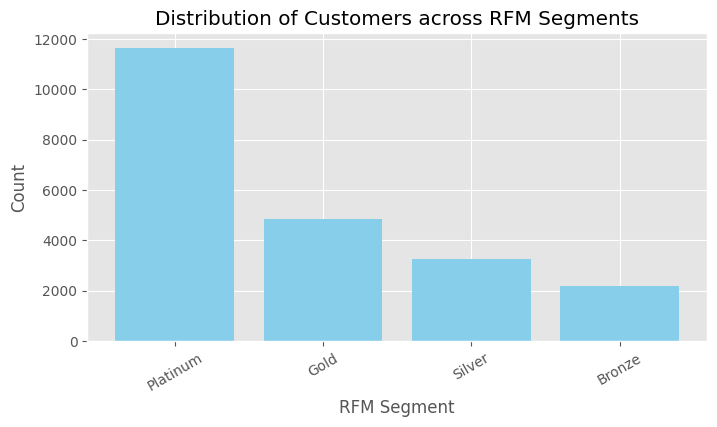

In [126]:
# Create a bar chart
plt.figure(figsize=(8, 4))
plt.bar(rfm_segment_counts['RFM Segment'], rfm_segment_counts['Count'], color='skyblue')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.title('Distribution of Customers across RFM Segments')
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability if needed

plt.show()

**3.2.  Distribution of customers by brand**

---



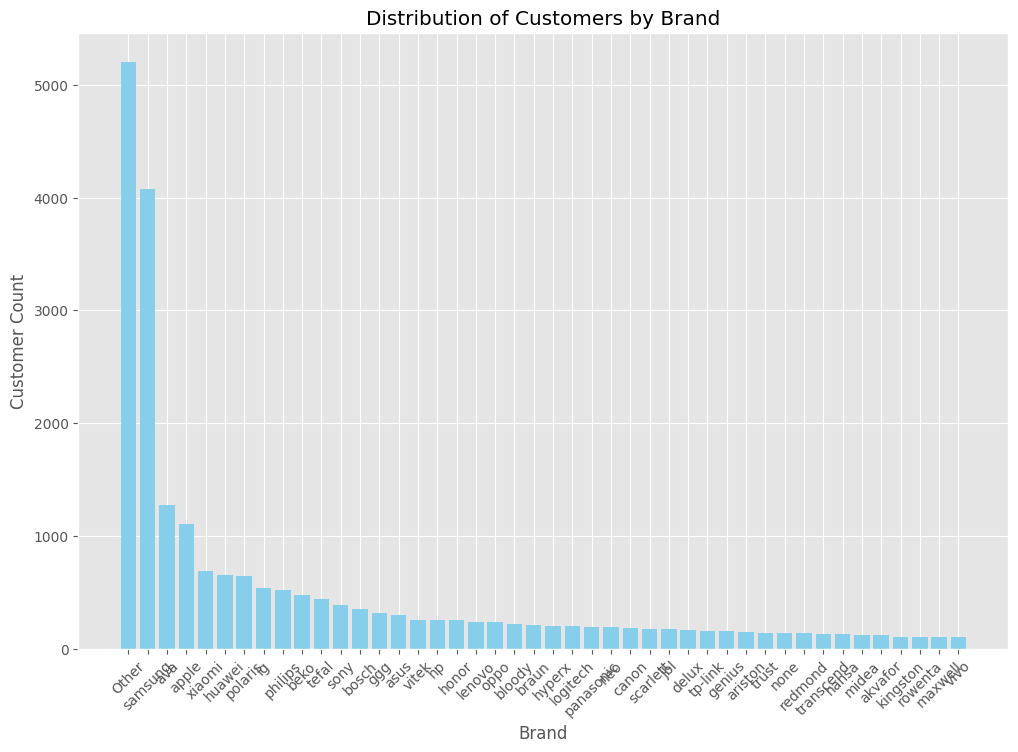

In [145]:
brand_counts = trans_rfm['brand'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(brand_counts.index, brand_counts.values, color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Customer Count')
plt.title('Distribution of Customers by Brand')
plt.xticks(rotation=45)
plt.show()

### Creating a new feature Brand Loyalty

In [147]:
trans_rfm['brand_loyalty'] = trans_rfm.groupby('order_id')['brand'].transform(lambda x: int(len(x.unique()) == 1))

**3.3.  Creating a heatmap to visualize the correlation matrix between RFM scores and other variables such as brand loyalty, recency, frequency, and monetary metrics**

<ipython-input-150-8d18ad6c2d70>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = trans_rfm.corr()


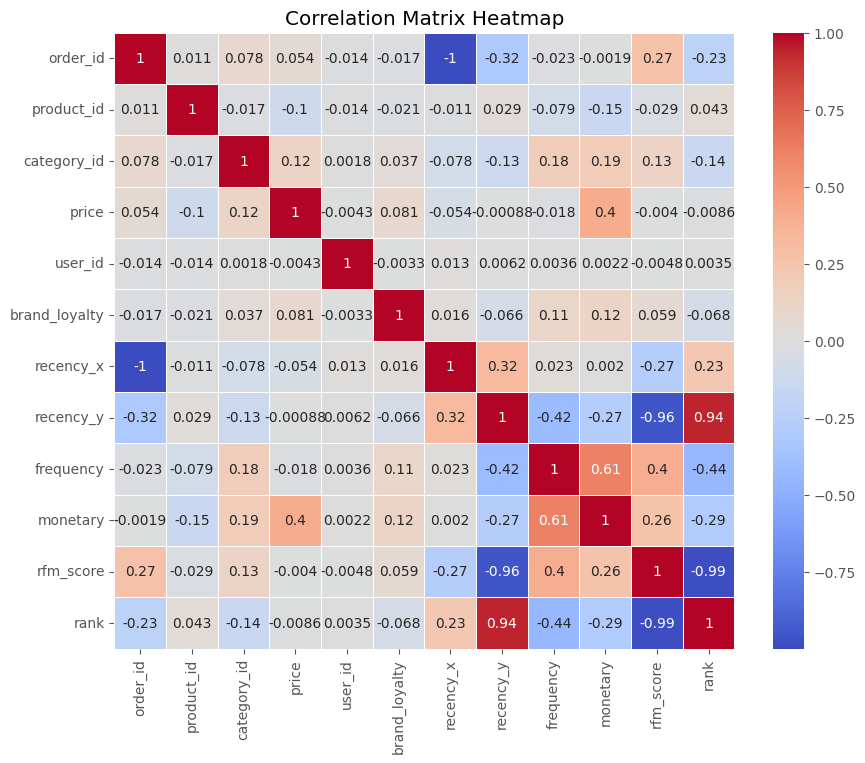

In [150]:
correlation_matrix = trans_rfm.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

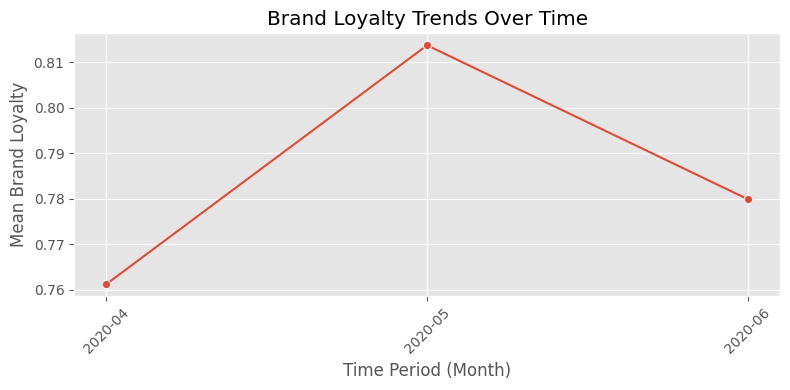

In [153]:
trans_rfm['month'] = trans_rfm['event_time'].dt.strftime('%Y-%m')
loyalty_by_month = trans_rfm.groupby('month')['brand_loyalty'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(8, 4))
sns.lineplot(x='month', y='brand_loyalty', data=loyalty_by_month, marker='o', linestyle='-')
plt.xlabel('Time Period (Month)')
plt.ylabel('Mean Brand Loyalty')
plt.title('Brand Loyalty Trends Over Time')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#4. RFM Analysis Scatter Plot

**4.1.  Recency vs Monetary**

The chart shows that customers who purchased recently generated more revenue than customers who visited long time ago. Customers from recent past (50-100) days generated a moderate revenue. Customers who visited 200 days ago generated a low revenue.

<Figure size 800x700 with 0 Axes>

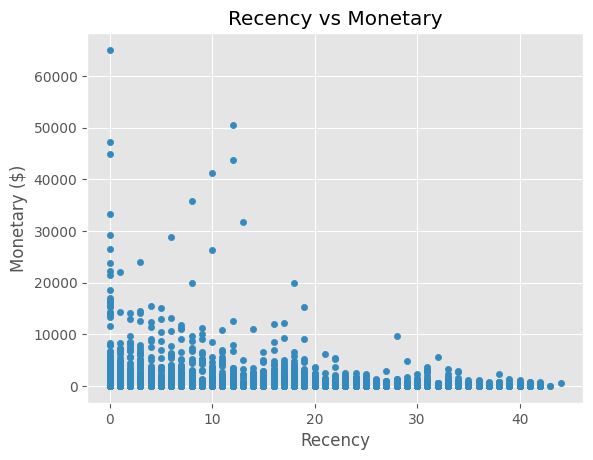

In [156]:
plt.figure(figsize=(8,7))
rfm_table.plot.scatter(x='recency' , y='monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

**4.2.  Frequency vs Monetary**



Customers classified as "Platinum Custoers" , "Very Loyal" and "Becoming Loyal" visit frequently, which correlated with increased revenue for the business.

<Figure size 800x700 with 0 Axes>

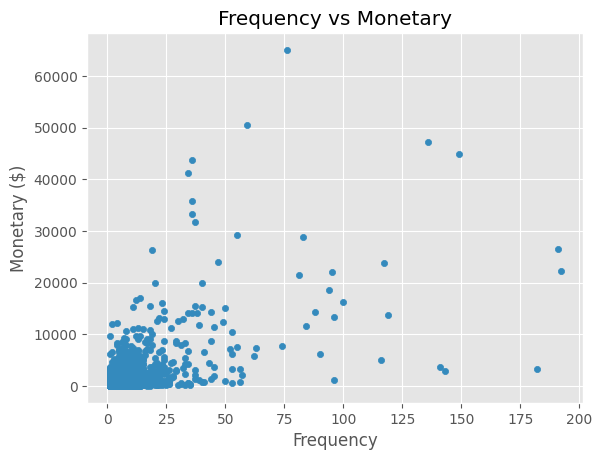

In [157]:
plt.figure(figsize=(8,7))
rfm_table.plot.scatter(x='frequency' , y='monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

# 5. Customer Segment Distribution

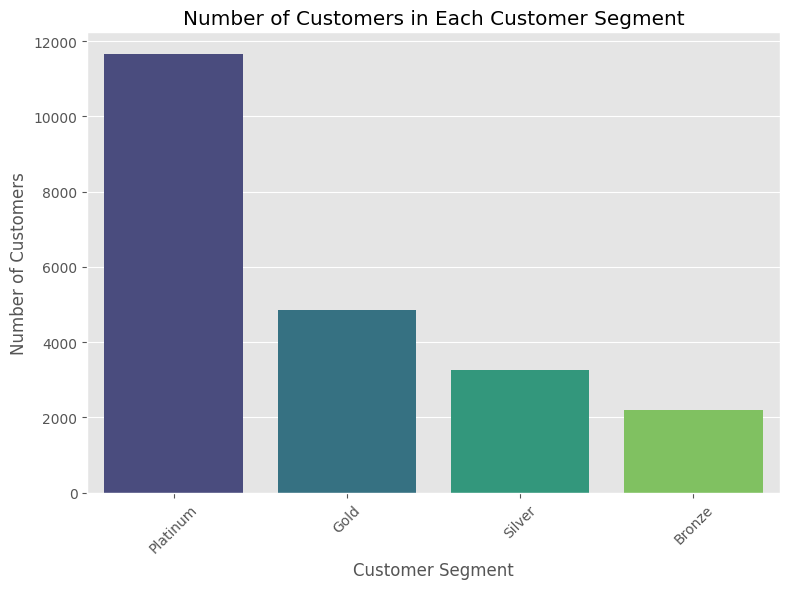

In [158]:
# Create a countplot to visualize the number of customers in each segment
plt.figure(figsize=(8, 6))
sns.countplot(data=trans_rfm, x='customer_title', order=trans_rfm['customer_title'].value_counts().index, palette='viridis')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Customer Segment')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [173]:
# Calculate the number of unique customers per customer title and rank
unique_customers_per_title = trans_rfm[['detail_cust_title', 'user_id', 'rank']].drop_duplicates().groupby(
    ['detail_cust_title', 'rank']).size().reset_index().sort_values('rank')

# Rename the columns for clarity
unique_customers_per_title.columns = ['detail_cust_title', 'Rank', 'Number of Customers']

# Display the result
unique_customers_per_title

,detail_cust_title,Rank,Number of Customers
9,Very Loyal,2,6810
1,Becoming Loyal,3,1343
8,Recent Customer,4,670
7,Potential Customer,5,2834
4,Late Bloomer,6,1004
5,Loosing Customer,7,1323
3,High Risk Customer,8,1068
0,Almost Lost Customer,9,454
2,Evasive Customer,10,986
6,Lost Customer,11,394


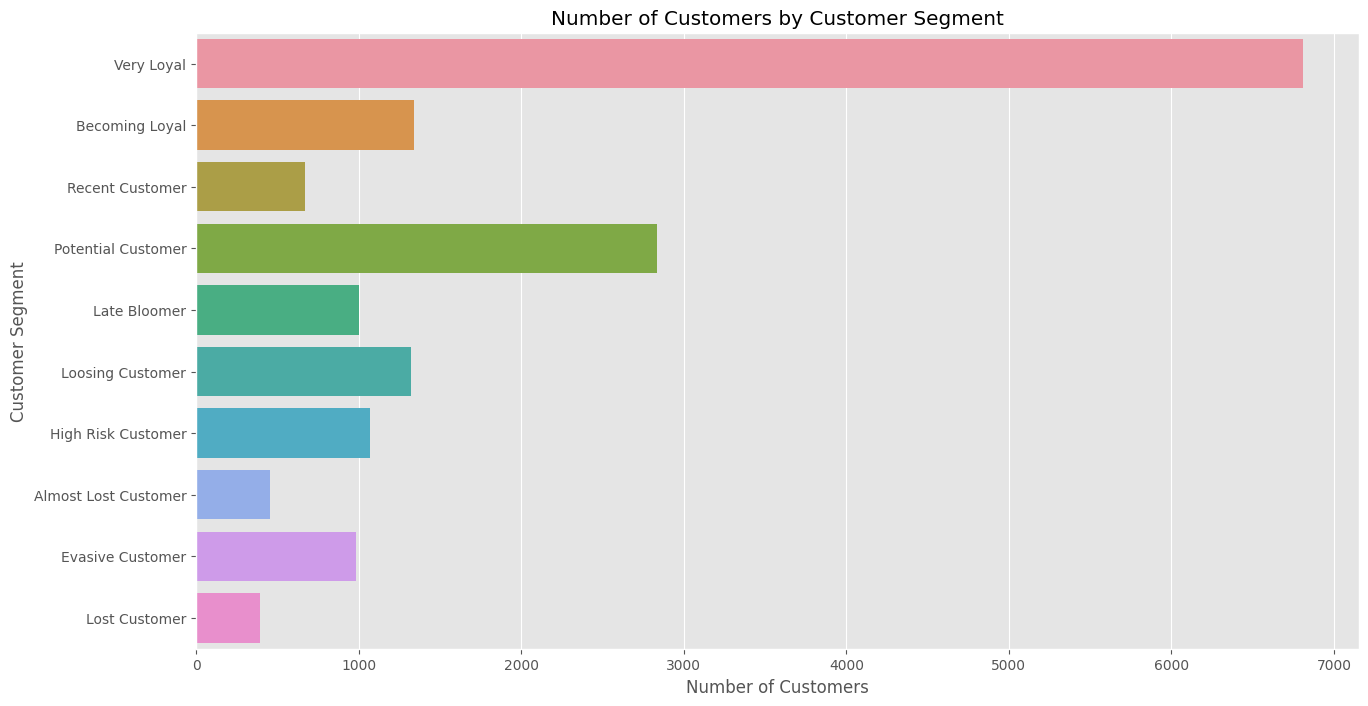

In [175]:
# Plotting the Number of Customers

plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers', data=unique_customers_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()